In [1]:
import qcfractal.interface as ptl
import json

from fragmenter.utils import HARTREE_2_KJMOL
import numpy as np
import oenotebook as oenb

In [2]:
import qcfractal.interface as ptl
client = ptl.FractalClient()
dataset = client.get_collection('TorsiondriveDataset', 'OpenFF Fragmenter Validation 1.0')
dataset.status('default')

,default
COMPLETE,16
RUNNING,3
ERROR,3


In [3]:
with open('torsiondrive-job-idx.json', 'r') as f:
    job_indices = json.load(f)

In [12]:
r = dataset.get_record('c1cc[c:1]2c(c1)ccc[c:2]2[O:3][P:4](=O)([O-])[O-]', 'default')

In [13]:
r.detailed_status()

{'status': 'RUNNING',
 'total_points': 24,
 'computed_points': 23,
 'complete_tasks': 65,
 'incomplete_tasks': 2,
 'error_tasks': 0,
 'current_tasks': 2,
 'percent_complete': 95.83333333333334,
 'errors': []}

In [4]:
molecule = 'Menadiol_diphosphate_0'
bond = '[9, 18]'
mol_type = ['parent', 'pfizer', '0.03']
indices = [job_indices[molecule][bond][i] for i in mol_type]
dataset.visualize(indices, 'default')

In [5]:
molecule = 'Phenformin_3'
bond = '[13, 7]'
mol_type = ['parent', 'pfizer', '0.03']
indices = [job_indices[molecule][bond][i] for i in mol_type]
dataset.visualize(indices, 'default')

In [6]:
molecule = 'Cimetidine_5'
bond = '[16, 5]'
mol_type = ['parent', 'pfizer', '0.03']
indices = [job_indices[molecule][bond][i] for i in mol_type]
dataset.visualize(indices, 'default')

In [7]:
molecule = 'Furosemide_0'
bond = '[14, 7]'
mol_type = ['parent', 'pfizer', '0.03']
indices = [job_indices[molecule][bond][i] for i in mol_type]
dataset.visualize(indices, 'default')

In [14]:
re = dataset.get_record('c1cc[c:1]([c:2](c1)[S:3](=[O:4])(=O)N)Cl', 'default')

In [15]:
re.detailed_status()

{'status': 'ERROR',
 'total_points': 24,
 'computed_points': 9,
 'complete_tasks': 16,
 'incomplete_tasks': 0,
 'error_tasks': 1,
 'current_tasks': 1,
 'percent_complete': 37.5,
 'errors': [OptimizationRecord(id='20576181', status='ERROR')]}

In [8]:
molecule = 'Furosemide_0'
bond = '[8, 20]'
mol_type = ['parent', 'pfizer', '0.03']
indices = [job_indices[molecule][bond][i] for i in mol_type]
dataset.visualize(indices, 'default')

In [9]:
molecule = 'Chloroprocaine_0'
bond = '[7, 17]'
mol_type = ['parent', 'pfizer', '0.03']
indices = [job_indices[molecule][bond][i] for i in mol_type]
dataset.visualize(indices, 'default')

In [ ]:
re = dataset.get_record('')

In [10]:
molecule = 'Nitazoxanide_0'
bond = '[14, 9]'
mol_type = ['parent', 'pfizer', '0.03']
indices = [job_indices[molecule][bond][i] for i in mol_type]
dataset.visualize(indices, 'default')

In [55]:
er_4 = errors_2[error_keys_2[-1]][0]
er_4.get_error()

ComputeError(error_type='BrokenProcessPool', error_message='Caught Executor Error:\nTraceback (most recent call last):\n  File "/opt/conda/envs/qcfractal/lib/python3.6/site-packages/qcfractal/queue/executor_adapter.py", line 15, in _get_future\n    return future.result()\n  File "/opt/conda/envs/qcfractal/lib/python3.6/concurrent/futures/_base.py", line 425, in result\n    return self.__get_result()\n  File "/opt/conda/envs/qcfractal/lib/python3.6/concurrent/futures/_base.py", line 384, in __get_result\n    raise self._exception\nconcurrent.futures.process.BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.\n')

In [3]:
# Find the errored scans
errors = {}
for index in dataset.df.index:
    r = dataset.get_record(index, 'default')
    if r.detailed_status()['status'] == 'ERROR':
        errors[index] = r.detailed_status()['errors']
        print(index)
error_keys = list(errors.keys())

c1cc[c:1]([c:2](c1)[S:3](=[O:4])(=O)N)Cl
Cc1c[c:1]([c:2](c(c1)I)[O:3][c:4]2cc(c(c(c2)I)[O-])I)I
c1cc[c:1](cc1)[O:2][c:3]2c(ccc[c:4]2I)I


In [80]:
r = dataset.get_record('c1cc[c:1]([c:2](c1)[S:3](=[O:4])(=O)N)Cl', 'default')

In [81]:
r

TorsionDriveRecord(id='20548994', status='ERROR')

In [82]:
er_0 = errors[error_keys[0]][0]
er_0.get_error()

ComputeError(error_type='CancelledError', error_message='Caught Executor Error:\nTraceback (most recent call last):\n  File "/home/chodera/miniconda/envs/qcfractal/lib/python3.6/site-packages/qcfractal/queue/executor_adapter.py", line 15, in _get_future\n    return future.result()\n  File "/home/chodera/miniconda/envs/qcfractal/lib/python3.6/concurrent/futures/_base.py", line 423, in result\n    raise CancelledError()\nconcurrent.futures._base.CancelledError\n')

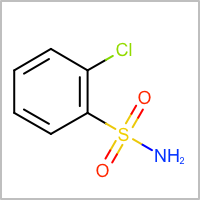

In [10]:
oenb.draw_smiles(error_keys[0])

In [6]:
re = dataset.get_record(error_keys[0], 'default')

In [33]:
re.keywords.dihedrals

[(5, 4, 9, 7)]

In [38]:
en = dataset.get_entry(error_keys[0])

In [39]:
en.attributes

{'canonical_smiles': 'c1ccc(c(c1)S(=O)(=O)N)Cl',
 'canonical_isomeric_smiles': 'c1ccc(c(c1)S(=O)(=O)N)Cl',
 'canonical_explicit_hydrogen_smiles': '[H]c1c(c(c(c(c1[H])S(=O)(=O)N([H])[H])Cl)[H])[H]',
 'canonical_isomeric_explicit_hydrogen_smiles': '[H]c1c(c(c(c(c1[H])S(=O)(=O)N([H])[H])Cl)[H])[H]',
 'canonical_isomeric_explicit_hydrogen_mapped_smiles': '[H:12][c:1]1[c:2]([c:4]([c:6]([c:5]([c:3]1[H:14])[S:10](=[O:8])(=[O:9])[N:7]([H:16])[H:17])[Cl:11])[H:15])[H:13]',
 'molecular_formula': 'C6H6ClNO2S',
 'standard_inchi': 'InChI=1S/C6H6ClNO2S/c7-5-3-1-2-4-6(5)11(8,9)10/h1-4H,(H2,8,9,10)',
 'inchi_key': 'JCCBZCMSYUSCFM-UHFFFAOYSA-N',
 'unique_tautomer_representation': 'NS(=O)(=O)c1ccccc1Cl',
 'unique_protomer_representation': 'c1ccc(c(c1)S(=O)(=O)N)Cl',
 'provenance': 'cmiles_v0.1.5+1.gdbd63e8_openeye_2019.Apr.2'}

In [14]:
client.query_molecules(re.initial_molecule[0])[0]

_ColormakerRegistry()

NGLWidget()

In [9]:
dataset.visualize(error_keys[0], 'default')

In [40]:
er_1 = errors[error_keys[1]][0]
er_1.get_error()

ComputeError(error_type='unknown', error_message='geomeTRIC run_json error:\nTraceback (most recent call last):\n  File "/home/chodera/miniconda/envs/qcfractal/lib/python3.6/site-packages/geometric/run_json.py", line 225, in geometric_run_json\n    geometric.optimize.Optimize(coords, M, IC, engine, None, params)\n  File "/home/chodera/miniconda/envs/qcfractal/lib/python3.6/site-packages/geometric/optimize.py", line 1331, in Optimize\n    return optimizer.optimizeGeometry()\n  File "/home/chodera/miniconda/envs/qcfractal/lib/python3.6/site-packages/geometric/optimize.py", line 1298, in optimizeGeometry\n    self.calcEnergyForce()\n  File "/home/chodera/miniconda/envs/qcfractal/lib/python3.6/site-packages/geometric/optimize.py", line 1002, in calcEnergyForce\n    spcalc = self.engine.calc(self.X, self.dirname)\n  File "/home/chodera/miniconda/envs/qcfractal/lib/python3.6/site-packages/geometric/engine.py", line 873, in calc\n    return self.calc_new(coords, dirname)\n  File "/home/choder

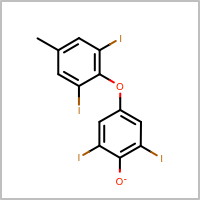

In [41]:
oenb.draw_smiles(error_keys[1])

In [42]:
er_2 = errors[error_keys[2]][0]
er_2.get_error()

ComputeError(error_type='unknown', error_message='geomeTRIC run_json error:\nTraceback (most recent call last):\n  File "/data/homezvol0/tgokey/.local/miniconda3/envs/qcf/lib/python3.7/site-packages/geometric/run_json.py", line 225, in geometric_run_json\n    geometric.optimize.Optimize(coords, M, IC, engine, None, params)\n  File "/data/homezvol0/tgokey/.local/miniconda3/envs/qcf/lib/python3.7/site-packages/geometric/optimize.py", line 1331, in Optimize\n    return optimizer.optimizeGeometry()\n  File "/data/homezvol0/tgokey/.local/miniconda3/envs/qcf/lib/python3.7/site-packages/geometric/optimize.py", line 1298, in optimizeGeometry\n    self.calcEnergyForce()\n  File "/data/homezvol0/tgokey/.local/miniconda3/envs/qcf/lib/python3.7/site-packages/geometric/optimize.py", line 1002, in calcEnergyForce\n    spcalc = self.engine.calc(self.X, self.dirname)\n  File "/data/homezvol0/tgokey/.local/miniconda3/envs/qcf/lib/python3.7/site-packages/geometric/engine.py", line 873, in calc\n    retu

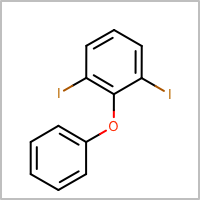

In [43]:
oenb.draw_smiles(error_keys[2])

In [49]:
dataset.visualize([error_keys[2]], 'default')

In [64]:
dataset.visualize(["c1c(cc([c:2]([c:1]1I)[O:3][c:4]2cc(c(c(c2)I)[O-])I)I)C[C@H](C(=O)[O-])[NH3+]"], 'default')

ValueError: zero-size array to reduction operation minimum which has no identity